#### load packages and data

In [ ]:
from AutoClass import AutoClassImpute, take_norm
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.metrics import adjusted_rand_score

In [3]:
expr_true = pd.read_csv('C:/Users/hli45/Desktop/simulated_data/Dataset3/truecounts.csv',index_col=0)
X_true = expr_true.values.astype('float32') #true count matrix
X_true_norm = take_norm(X_true) #library size normalize and log transform

cellinfo = pd.read_csv('C:/Users/hli45/Desktop/simulated_data/Dataset3/cellinfo.csv',index_col=0)
celltype = cellinfo['Group']
Y = pd.factorize(celltype)[0]
K = len(np.unique(Y))
ncell, ngene = X_true.shape
print(K,ncell,ngene)


5 500 899


#### Poisson noise

In [4]:
lam = np.mean(X_true)*2
noise = np.random.poisson(lam,(ncell,ngene))
X_p = X_true + noise

In [5]:
#denoise
res = AutoClassImpute(X_p)
imp_auto_p = (res['imp'])

500 cells and 899 genes
number of clusters in pre-clustering:[8, 9, 10]
n_cluster = 8...
n_cluster = 9...
n_cluster = 10...
escape time is: 14.561472415924072


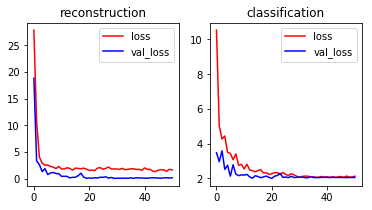

In [6]:
#plot losses
fig = plt.figure(figsize=(6,3))
fig.add_subplot(121)
plt.plot(res['loss_history'][0]['reconstruction_loss'],'r',label='loss')
plt.plot(res['loss_history'][0]['val_reconstruction_loss'],'b',label='val_loss')
plt.title('reconstruction')
plt.legend()
fig.add_subplot(122)
plt.plot(res['loss_history'][0]['classification_loss'],'r',label='loss')
plt.plot(res['loss_history'][0]['val_classification_loss'],'b',label='val_loss')
plt.title('classification')
plt.legend()

In [7]:
pca_auto = PCA(n_components=50).fit_transform(imp_auto_p)
tsne_auto_p = TSNE(n_components=2).fit_transform(pca_auto)

pca_raw = PCA(n_components=50).fit_transform(take_norm(X_p))
tsne_raw_p = TSNE(n_components=2).fit_transform(pca_raw)

pca_true = PCA(n_components=50).fit_transform(X_true_norm)
tsne_true = TSNE(n_components=2).fit_transform(pca_true)

0.63 0.23 -0.07


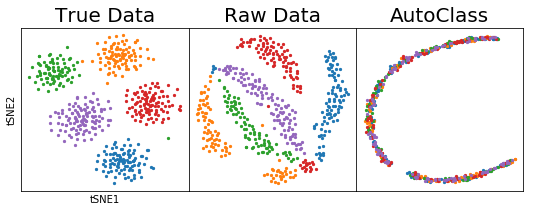

In [9]:
label = Y
unique_class=np.unique(Y)
fig = plt.figure(figsize=(9,3))
plt.subplots_adjust(wspace=0)
ax = fig.add_subplot(131)
for i in range(K):
    ax.scatter(tsne_true[label==unique_class[i],0],
                tsne_true[label==unique_class[i],1], 
                s=5,label = unique_class[i] )
    plt.xlabel('tSNE1')
    plt.ylabel('tSNE2')
    plt.title('True Data',fontsize=20)

plt.xticks([], [])
plt.yticks([], [])

ax = fig.add_subplot(132)

for i in range(K):
    ax.scatter(tsne_raw_p[label==unique_class[i],0],
                tsne_raw_p[label==unique_class[i],1], 
                s=5,label = unique_class[i] )
    plt.title('Raw Data',fontsize=20)

plt.xticks([], [])
plt.yticks([], [])

ax = fig.add_subplot(133)
for i in range(K):
    ax.scatter(tsne_auto_p[label==unique_class[i],0],
                tsne_auto_p[label==unique_class[i],1], 
                s=5,label = unique_class[i] )
plt.title('AutoClass',fontsize=20)
    
plt.xticks([], [])
plt.yticks([], [])
    

asw_true = np.round(silhouette_score(tsne_true,Y),2)
asw_raw = np.round(silhouette_score(tsne_raw_p,Y),2)
asw_auto = np.round(silhouette_score(tsne_auto_p,Y),2)
    

print(asw_true,asw_raw,asw_auto)

#### dropout 

In [10]:
expr = pd.read_csv('C:/Users/hli45/Desktop/simulated_data/Dataset3/counts.csv',index_col=0)
X = expr.values.astype('float32') #raw count matrix (with dropout)
X_norm = take_norm(X)

In [11]:
#denoise
res = AutoClassImpute(X)
imp_auto = (res['imp'])

500 cells and 899 genes
number of clusters in pre-clustering:[8, 9, 10]
n_cluster = 8...
n_cluster = 9...
n_cluster = 10...
escape time is: 23.854087352752686


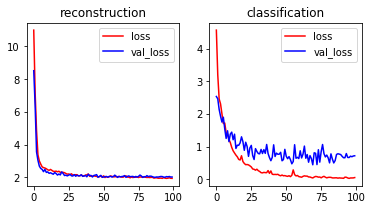

In [12]:
#plot losses
fig = plt.figure(figsize=(6,3))
fig.add_subplot(121)
plt.plot(res['loss_history'][0]['reconstruction_loss'],'r',label='loss')
plt.plot(res['loss_history'][0]['val_reconstruction_loss'],'b',label='val_loss')
plt.title('reconstruction')
plt.legend()
fig.add_subplot(122)
plt.plot(res['loss_history'][0]['classification_loss'],'r',label='loss')
plt.plot(res['loss_history'][0]['val_classification_loss'],'b',label='val_loss')
plt.title('classification')
plt.legend()

In [15]:
pca_auto = PCA(n_components=50).fit_transform(imp_auto)
tsne_auto = TSNE(n_components=2).fit_transform((pca_auto))
pca_raw = PCA(n_components=50).fit_transform(X_norm)
tsne_raw = TSNE(n_components=2).fit_transform((pca_raw))

0.63 -0.03 0.41


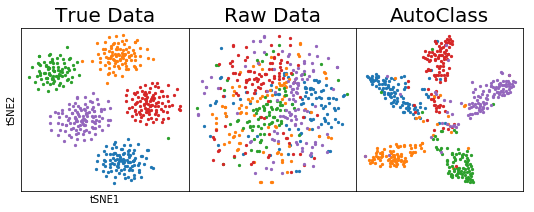

In [16]:
label = Y
unique_class=np.unique(Y)
fig = plt.figure(figsize=(9,3))
plt.subplots_adjust(wspace=0)
ax = fig.add_subplot(131)
for i in range(K):
    ax.scatter(tsne_true[label==unique_class[i],0],
                tsne_true[label==unique_class[i],1], 
                s=5,label = unique_class[i] )
    plt.xlabel('tSNE1')
    plt.ylabel('tSNE2')
    plt.title('True Data',fontsize=20)

plt.xticks([], [])
plt.yticks([], [])

ax = fig.add_subplot(132)

for i in range(K):
    ax.scatter(tsne_raw[label==unique_class[i],0],
                tsne_raw[label==unique_class[i],1], 
                s=5,label = unique_class[i] )
    plt.title('Raw Data',fontsize=20)

plt.xticks([], [])
plt.yticks([], [])

ax = fig.add_subplot(133)
for i in range(K):
    ax.scatter(tsne_auto[label==unique_class[i],0],
                tsne_auto[label==unique_class[i],1], 
                s=5,label = unique_class[i] )
plt.title('AutoClass',fontsize=20)
    
plt.xticks([], [])
plt.yticks([], [])
    

asw_true = np.round(silhouette_score(tsne_true,Y),2)
asw_raw = np.round(silhouette_score(tsne_raw,Y),2)
asw_auto = np.round(silhouette_score(tsne_auto,Y),2)
    

print(asw_true,asw_raw,asw_auto)